In [1]:
'''
L.S. Nice and clean analysis of the data. Despite the problems relatig to the difficulty of finding good data in this
domain, you managed to get an interesting result. Moreover, the analysis was solid. The presentation was nice. For next time, I would spend some
more time on the actual visualisation so that you captivate the audience a bit more. It was a clever idea to scrape some data
from Wikipedia and merge this with the other data. 
'''



import json
import requests
import pandas as pd
import seaborn as sns
import json
import requests
import pandas as pd
import seaborn as sns
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
from ipywidgets import interact
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import chart_studio.plotly as py
import cufflinks as cf
from ipywidgets import interact

cf.go_offline()

In [2]:
data3 = pd.read_csv('./transfer_data.csv')
data3.head(10)

,PLAYER,WINDOW,POSITION,COUNTRY,FROM,TO,DESCRIPTION,PRICE,LEAGUE,SEASON
0,Paul Pogba,Pre-Season,Midfielder,France,Juventus,Manchester United,Sold,105000000.0,EPL,16/17
1,Gareth Bale,Pre-Season,Midfielder,Wales,Tottenham,Real Madrid,Sold,100000000.0,La Liga,13/14
2,Luis Suarez,Pre-Season,Attacker,Uruguay,Liverpool,Barcelona,Sold,95000000.0,La Liga,14/15
3,Ronaldo,Pre-Season,NaN,NaN,Manchester United,Real Madrid,Sold,93900000.0,La Liga,09/10
4,Gonzalo Higuain,Pre-Season,Attacker,Argentina,Napoli,Juventus,Sold,90000000.0,Serie A,16/17
5,James Rodriguez,Pre-Season,Midfielder,Colombia,Monaco,Real Madrid,Sold,80000000.0,La Liga,14/15
6,Kevin De Bruyne,Pre-Season,Midfielder,Belgium,Wolfsburg,Manchester City,Sold,76000000.0,EPL,15/16
7,Angel Di Maria,Pre-Season,Midfielder,Argentina,Real Madrid,Manchester United,Sold,75000000.0,EPL,14/15
8,Raheem Sterling,Pre-Season,Midfielder,England,Liverpool,Manchester City,Sold,69400000.0,EPL,15/16
9,Zlatan Ibrahimovic,Pre-Season,NaN,NaN,Inter Milan,Barcelona,Sold,69000000.0,La Liga,09/10


In [3]:
data1 = data3.drop('DESCRIPTION', axis=1)
data4 = data1.drop('WINDOW', axis=1)
data2 = data4[data1.SEASON != '15']
data = data2[data2.SEASON != '16']
data.head(10)

,PLAYER,POSITION,COUNTRY,FROM,TO,PRICE,LEAGUE,SEASON
0,Paul Pogba,Midfielder,France,Juventus,Manchester United,105000000.0,EPL,16/17
1,Gareth Bale,Midfielder,Wales,Tottenham,Real Madrid,100000000.0,La Liga,13/14
2,Luis Suarez,Attacker,Uruguay,Liverpool,Barcelona,95000000.0,La Liga,14/15
3,Ronaldo,NaN,NaN,Manchester United,Real Madrid,93900000.0,La Liga,09/10
4,Gonzalo Higuain,Attacker,Argentina,Napoli,Juventus,90000000.0,Serie A,16/17
5,James Rodriguez,Midfielder,Colombia,Monaco,Real Madrid,80000000.0,La Liga,14/15
6,Kevin De Bruyne,Midfielder,Belgium,Wolfsburg,Manchester City,76000000.0,EPL,15/16
7,Angel Di Maria,Midfielder,Argentina,Real Madrid,Manchester United,75000000.0,EPL,14/15
8,Raheem Sterling,Midfielder,England,Liverpool,Manchester City,69400000.0,EPL,15/16
9,Zlatan Ibrahimovic,NaN,NaN,Inter Milan,Barcelona,69000000.0,La Liga,09/10


In [4]:
wiki = pd.read_csv('./wiki.csv')
wiki.head(10)

,Placement,TO,Revenue,SEASON
0,1,Manchester United,689000000.0,16/17
1,2,Barcelona,620200000.0,16/17
2,3,Real Madrid,620100000.0,16/17
3,4,Bayern Munich,592000000.0,16/17
4,5,Manchester City,524900000.0,16/17
5,6,Paris Saint‑Germain,520900000.0,16/17
6,7,Arsenal,468500000.0,16/17
7,8,Chelsea,447400000.0,16/17
8,9,Liverpool,403800000.0,16/17
9,10,Juventus,341100000.0,16/17


In [5]:
rating = pd.read_csv('./rating.csv')

rating.fillna = 0

In [6]:
#rat = rating.groupby(rating.TO)["Res_Rating"].mean()

rat = rating.groupby(by="TO").mean().sort_values(by = "Res_Rating", ascending=False)
rat1 = rat.drop('Rating', axis=1).reset_index()
rat1.columns = ["FROM", "Rating"]
rat1[50:80]
#rat1[rat1.FROM == "FC Monaco"]

,FROM,Rating
50,Málaga CF,50.800000
51,Osasuna,48.500000
52,FC Twente Enschede,48.142857
53,Steaua Bucuresti,47.500000
54,Celtic,47.000000
55,Viktoria Plzen,47.000000
56,Athletic Bilbao,46.900000
57,Lille OSC,46.500000
58,Spartak Moscow,45.875000
59,Rapid Bucuresti,45.333333


In [7]:
data.groupby(data.SEASON)['PLAYER'].count()

SEASON
07/08    257
08/09    131
09/10    537
10/11    561
11/12    661
12/13    633
13/14    823
14/15    773
15/16    866
16/17    648
Name: PLAYER, dtype: int64

In [8]:
data.groupby(data.LEAGUE)['PLAYER'].count()

LEAGUE
Bundesliga     468
EPL           1338
La Liga       1138
ROE           1171
Serie A       1775
Name: PLAYER, dtype: int64

In [9]:
#data_from = data.groupby(data.FROM)['PRICE'].sum().sort_values(ascending=False)
#data_from.head(30)
data_from = data.groupby(by="FROM").sum().sort_values(by = "PRICE", ascending=False)
data_from1 = data_from.reset_index()
data_from1.columns = ['FROM', 'Sell']
data_from1.head(3)

,FROM,Sell
0,Porto,503100000.0
1,Liverpool,490900000.0
2,Benfica,439000000.0


In [10]:
data_to = data.groupby(by="TO").sum().sort_values(by = "PRICE", ascending=False)
data_to1 = data_to.reset_index()
data_to1.columns = ['FROM', 'Buy']
data_to1.head(3)

,FROM,Buy
0,Manchester City,1.067575e+09
1,Real Madrid,1.005800e+09
2,Barcelona,8.769000e+08


In [11]:
res = pd.merge(data_from1, data_to1, how='left', on=['FROM'])
res1 = res.head(30)
res1.head(5)

,FROM,Sell,Buy
0,Porto,503100000.0,1.543000e+08
1,Liverpool,490900000.0,6.356300e+08
2,Benfica,439000000.0,1.044000e+08
3,Real Madrid,424400000.0,1.005800e+09
4,Valencia,421250000.0,2.732000e+08


In [12]:
res1.iplot(kind='bar', x='FROM', xTitle='Club', color=['green', 'blue'], yTitle='Price', title='Total sell and buy')

In [13]:
res1['Strategy'] = 1
res1.Strategy.loc[(res1.Sell < res1.Buy)] = 2
a = res1[res1.Strategy == 1]
b = res1[res1.Strategy == 2]
b

,FROM,Sell,Buy,Strategy
1,Liverpool,490900000.0,6.356300e+08,2
3,Real Madrid,424400000.0,1.005800e+09,2
5,Atletico Madrid,368700000.0,5.554000e+08,2
6,Chelsea,353600000.0,7.986500e+08,2
8,Roma,337800000.0,4.351500e+08,2
9,Tottenham,331450000.0,4.136000e+08,2
10,Juventus,319100000.0,6.583000e+08,2
11,Barcelona,280600000.0,8.769000e+08,2
12,Monaco,272200000.0,2.944500e+08,2
13,Inter Milan,270200000.0,3.895000e+08,2


In [14]:
res2 = pd.merge(res1, rat1, how='left', on=['FROM'])
res2.Rating[0] = 88.7
res2.Rating[5] = 81.3
res2.Rating[8] = 69.2
res2.Rating[9] = 76.6
res2.Rating[11] = 99
res2.Rating[12] = 44.1
res2.Rating[13] = 84.6
res2.Rating[15] = 9
res2.Rating[20] = 46.5
res2.Rating[26] = 43.5
res2.Rating[27] = 68.7
res2.Rating[28] = 96.5
res2.Rating[22] = 85.9
res2.Rating[23] = 43.7

a = res2[res2.Strategy == 1]
b = res2[res2.Strategy == 2]

res2.head(10)

,FROM,Sell,Buy,Strategy,Rating
0,Porto,503100000.0,1.543000e+08,1,88.7
1,Liverpool,490900000.0,6.356300e+08,2,82.3
2,Benfica,439000000.0,1.044000e+08,1,88.6
3,Real Madrid,424400000.0,1.005800e+09,2,95.4
4,Valencia,421250000.0,2.732000e+08,1,85.8
5,Atletico Madrid,368700000.0,5.554000e+08,2,81.3
6,Chelsea,353600000.0,7.986500e+08,2,97.2
7,Sevilla,348250000.0,1.979000e+08,1,84.5
8,Roma,337800000.0,4.351500e+08,2,69.2
9,Tottenham,331450000.0,4.136000e+08,2,76.6


In [15]:
res2.corr()

,Sell,Buy,Strategy,Rating
Sell,1.000000,0.258475,-0.033148,0.427585
Buy,0.258475,1.000000,0.662698,0.417117
Strategy,-0.033148,0.662698,1.000000,0.221395
Rating,0.427585,0.417117,0.221395,1.000000


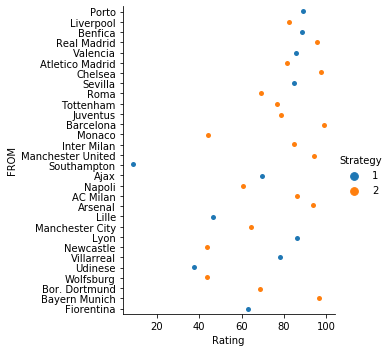

In [16]:
ax = sns.catplot(x="Rating", y="FROM", hue="Strategy",data=res2)
ax

In [17]:
data.groupby(data.POSITION)['PLAYER'].count()

POSITION
Attacker      1295
Defender      1376
Goalkeeper     336
Midfielder    1756
Name: PLAYER, dtype: int64

In [18]:
data_teams = data.groupby(data.TO)['PLAYER'].count().sort_values(ascending=False)
data_teams[:30]

TO
Roma               116
Genoa              110
Fiorentina         107
Juventus           101
Sampdoria           99
AC Milan            99
Sunderland          89
Palermo             85
Udinese             84
Parma               82
Sevilla             81
Malaga              81
Inter Milan         79
West Ham            79
Atletico Madrid     76
Napoli              75
Torino              70
Valencia            69
Chievo              68
Liverpool           66
Atalanta            64
Lazio               63
Manchester City     62
Granada             62
Bologna             61
Chelsea             59
Everton             54
Espanyol            54
Tottenham           54
Real Madrid         53
Name: PLAYER, dtype: int64

In [19]:
data.PRICE.sum()

17192435000.0

In [20]:
data.groupby(data.COUNTRY)['PLAYER'].count().sort_values(ascending=False).head()

COUNTRY
Italy      523
Spain      509
France     395
England    337
Brazil     314
Name: PLAYER, dtype: int64